# Time Series

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Date and Time Data Types and Tools

In [2]:
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

(2024, 11, 30)

In [3]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

56700

In [4]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [5]:
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [6]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [7]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [8]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [9]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [10]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [11]:
idx = pd.to_datetime(datestrs + [None])
idx
idx[2]
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics

In [12]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [13]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [14]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [15]:
ts.index.dtype

dtype('<M8[ns]')

In [16]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [17]:
stamp = ts.index[2]
ts[stamp]

np.float64(-0.5194387150567381)

In [ ]:
ts['1/10/2011']
ts['20110110']

In [18]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts
longer_ts['2001']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [ ]:
longer_ts['2001-05']

In [19]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [20]:
ts
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [21]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [ ]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

### Time Series with Duplicate Indices

In [22]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [23]:
dup_ts.index.is_unique

False

In [24]:
dup_ts['1/3/2000']  # not duplicated
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [25]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [26]:
ts
resampler = ts.resample('D')

### Generating Date Ranges

In [27]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [28]:
pd.date_range(start='2012-04-01', periods=20)
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [29]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

/var/folders/yq/mg65c_l16hv64plnb99z5dx40000gq/T/ipykernel_26203/2615318183.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range('2000-01-01', '2000-12-01', freq='BM')


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

In [30]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [31]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [32]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [33]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [34]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [35]:
Hour(2) + Minute(30)

<150 * Minutes>

In [36]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

#### Week of month dates

In [37]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

### Shifting (Leading and Lagging) Data

In [39]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='ME'))
ts
ts.shift(2)
ts.shift(-2)

2000-01-31   -0.072052
2000-02-29    0.544066
2000-03-31         NaN
2000-04-30         NaN
Freq: ME, dtype: float64

ts / ts.shift(1) - 1

In [41]:
ts.shift(2, freq='ME')

2000-03-31    0.884111
2000-04-30   -0.608506
2000-05-31   -0.072052
2000-06-30    0.544066
Freq: ME, dtype: float64

In [43]:
ts.shift(3, freq='D')
ts.shift(1, freq='90min')

2000-01-31 01:30:00    0.884111
2000-02-29 01:30:00   -0.608506
2000-03-31 01:30:00   -0.072052
2000-04-30 01:30:00    0.544066
dtype: float64

#### Shifting dates with offsets

In [44]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [45]:
now + MonthEnd()
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [46]:
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [47]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts
ts.groupby(offset.rollforward).mean()

2000-01-31    0.095559
2000-02-29   -0.166318
2000-03-31    0.037391
dtype: float64

In [49]:
ts.resample('ME').mean()

2000-01-31    0.095559
2000-02-29   -0.166318
2000-03-31    0.037391
Freq: ME, dtype: float64

## Time Zone Handling

In [50]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [51]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [52]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    1.127453
2012-03-10 09:30:00    2.183830
2012-03-11 09:30:00   -1.186623
2012-03-12 09:30:00    0.334270
2012-03-13 09:30:00   -1.028389
2012-03-14 09:30:00   -0.168496
Freq: D, dtype: float64

In [53]:
print(ts.index.tz)

None


In [ ]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

In [54]:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [55]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    1.127453
2012-03-10 04:30:00-05:00    2.183830
2012-03-11 05:30:00-04:00   -1.186623
2012-03-12 05:30:00-04:00    0.334270
2012-03-13 05:30:00-04:00   -1.028389
2012-03-14 05:30:00-04:00   -0.168496
Freq: D, dtype: float64

In [56]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    1.127453
2012-03-10 15:30:00+01:00    2.183830
2012-03-11 14:30:00+01:00   -1.186623
2012-03-12 14:30:00+01:00    0.334270
2012-03-13 14:30:00+01:00   -1.028389
2012-03-14 14:30:00+01:00   -0.168496
dtype: float64

In [57]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone−Aware Timestamp Objects

In [58]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [59]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [60]:
stamp_utc.value
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [61]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [62]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [63]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Periods and Period Arithmetic

In [64]:
p = pd.Period(2007, freq='A-DEC')
p

/var/folders/yq/mg65c_l16hv64plnb99z5dx40000gq/T/ipykernel_26203/3368258612.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period(2007, freq='A-DEC')


Period('2007', 'Y-DEC')

In [65]:
p + 5
p - 2

Period('2005', 'Y-DEC')

In [66]:
pd.Period('2014', freq='A-DEC') - p

/var/folders/yq/mg65c_l16hv64plnb99z5dx40000gq/T/ipykernel_26203/1089596655.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  pd.Period('2014', freq='A-DEC') - p


<7 * YearEnds: month=12>

In [67]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [68]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.459849
2000-02    0.333392
2000-03   -0.254742
2000-04   -0.448301
2000-05   -1.261344
2000-06    1.165148
Freq: M, dtype: float64

In [69]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period Frequency Conversion

In [71]:
p = pd.Period('2007', freq='Y-DEC')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [73]:
p = pd.Period('2007', freq='Y-JUN')
p
p.asfreq('M', 'start')
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [75]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('Y-JUN')

Period('2008', 'Y-JUN')

In [77]:
rng = pd.period_range('2006', '2009', freq='Y-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.asfreq('M', how='start')

2006-01    0.316447
2007-01    0.838295
2008-01   -1.034423
2009-01    0.434304
Freq: M, dtype: float64

In [79]:
ts.asfreq(freq='B', how='end')

/var/folders/yq/mg65c_l16hv64plnb99z5dx40000gq/T/ipykernel_26203/2506330133.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq(freq='B', how='end')


2006-12-29    0.316447
2007-12-31    0.838295
2008-12-31   -1.034423
2009-12-31    0.434304
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [80]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [81]:
p.asfreq('D', 'start')
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [83]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('min', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

/var/folders/yq/mg65c_l16hv64plnb99z5dx40000gq/T/ipykernel_26203/2694820181.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq('B', 'e') - 1).asfreq('min', 's') + 16 * 60


Timestamp('2012-01-30 16:00:00')

In [85]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('min', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

/var/folders/yq/mg65c_l16hv64plnb99z5dx40000gq/T/ipykernel_26203/708549049.py:4: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_rng = (rng.asfreq('B', 'e') - 1).asfreq('min', 's') + 16 * 60


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

In [87]:
rng = pd.date_range('2000-01-01', periods=3, freq='ME')
ts = pd.Series(np.random.randn(3), index=rng)
ts
pts = ts.to_period()
pts

2000-01    0.339231
2000-02   -0.688756
2000-03   -0.815526
Freq: M, dtype: float64

In [88]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2
ts2.to_period('M')

2000-01   -0.332420
2000-01    2.406483
2000-01   -1.361428
2000-02   -0.669619
2000-02    0.781199
2000-02   -0.395813
Freq: M, dtype: float64

In [89]:
pts = ts2.to_period()
pts
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.332420
2000-01-30 23:59:59.999999999    2.406483
2000-01-31 23:59:59.999999999   -1.361428
2000-02-01 23:59:59.999999999   -0.669619
2000-02-02 23:59:59.999999999    0.781199
2000-02-03 23:59:59.999999999   -0.395813
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [90]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)
data.year
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [92]:
index = pd.PeriodIndex.from_fields(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

In [94]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('ME').mean()
ts.resample('ME', kind='period').mean()

/var/folders/yq/mg65c_l16hv64plnb99z5dx40000gq/T/ipykernel_26203/2504391392.py:5: FutureWarning: The 'kind' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  ts.resample('ME', kind='period').mean()


2000-01   -0.111572
2000-02   -0.306087
2000-03    0.246739
2000-04    0.066482
Freq: M, dtype: float64

### Downsampling

In [96]:
rng = pd.date_range('2000-01-01', periods=12, freq='min')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int64

In [97]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int64

In [98]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int64

In [99]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5min, dtype: int64

In [101]:
ts.resample('5min', closed='right',
            label='right', offset='-1s').sum()

2000-01-01 00:04:59    10
2000-01-01 00:09:59    35
2000-01-01 00:14:59    21
Freq: 5min, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In [102]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [103]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.139568,-0.284079,-0.708196,2.463238
2000-01-12,0.217453,-0.010560,-0.006045,0.490094


In [104]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.139568,-0.284079,-0.708196,2.463238
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.217453,-0.010560,-0.006045,0.490094


In [105]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.139568,-0.284079,-0.708196,2.463238
2000-01-06,0.139568,-0.284079,-0.708196,2.463238
2000-01-07,0.139568,-0.284079,-0.708196,2.463238
2000-01-08,0.139568,-0.284079,-0.708196,2.463238
2000-01-09,0.139568,-0.284079,-0.708196,2.463238
2000-01-10,0.139568,-0.284079,-0.708196,2.463238
2000-01-11,0.139568,-0.284079,-0.708196,2.463238
2000-01-12,0.217453,-0.010560,-0.006045,0.490094


In [106]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.139568,-0.284079,-0.708196,2.463238
2000-01-06,0.139568,-0.284079,-0.708196,2.463238
2000-01-07,0.139568,-0.284079,-0.708196,2.463238
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.217453,-0.010560,-0.006045,0.490094


In [107]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.139568,-0.284079,-0.708196,2.463238
2000-01-13,0.217453,-0.010560,-0.006045,0.490094


### Resampling with Periods

In [109]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
annual_frame = frame.resample('Y-DEC').mean()
annual_frame

/var/folders/yq/mg65c_l16hv64plnb99z5dx40000gq/T/ipykernel_26203/3867388237.py:6: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame = frame.resample('Y-DEC').mean()


,Colorado,Texas,New York,Ohio
2000,-0.184406,0.112233,-0.244879,0.210245
2001,0.315546,-0.142040,-0.063440,-0.152948


In [ ]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()
annual_frame.resample('Q-DEC', convention='end').ffill()

In [110]:
annual_frame.resample('Q-MAR').ffill()

/var/folders/yq/mg65c_l16hv64plnb99z5dx40000gq/T/ipykernel_26203/3348307439.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-MAR').ffill()


,Colorado,Texas,New York,Ohio
2000Q4,-0.184406,0.112233,-0.244879,0.210245
2001Q1,-0.184406,0.112233,-0.244879,0.210245
2001Q2,-0.184406,0.112233,-0.244879,0.210245
2001Q3,-0.184406,0.112233,-0.244879,0.210245
2001Q4,0.315546,-0.142040,-0.063440,-0.152948
2002Q1,0.315546,-0.142040,-0.063440,-0.152948
2002Q2,0.315546,-0.142040,-0.063440,-0.152948
2002Q3,0.315546,-0.142040,-0.063440,-0.152948


## Moving Window Functions

In [111]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

<Axes: >

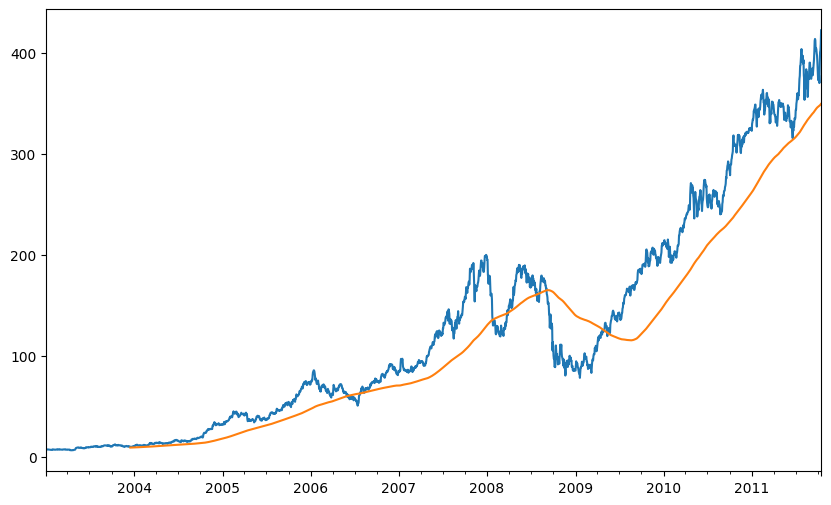

In [112]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [113]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

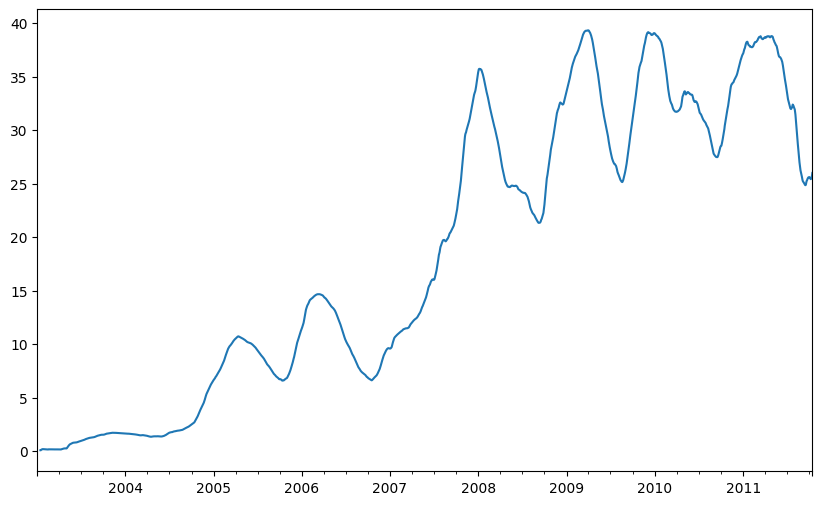

In [114]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

In [115]:
expanding_mean = appl_std250.expanding().mean()

In [116]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

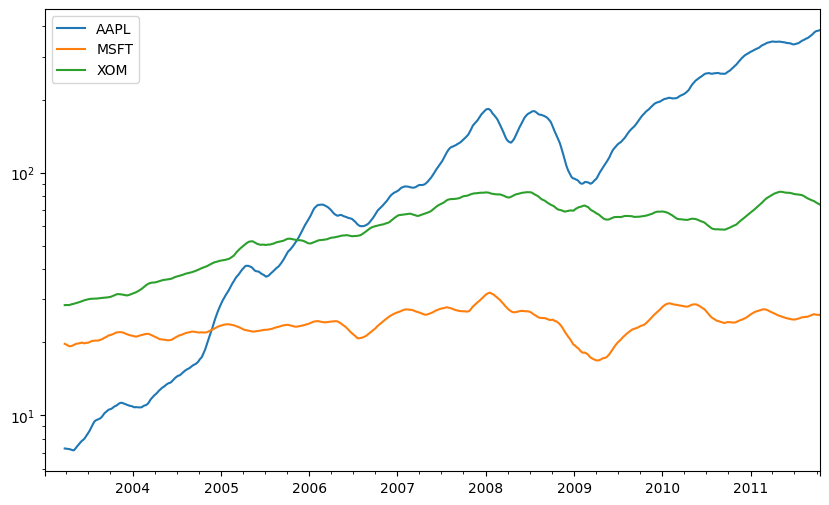

In [117]:
close_px.rolling(60).mean().plot(logy=True)

In [118]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [119]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

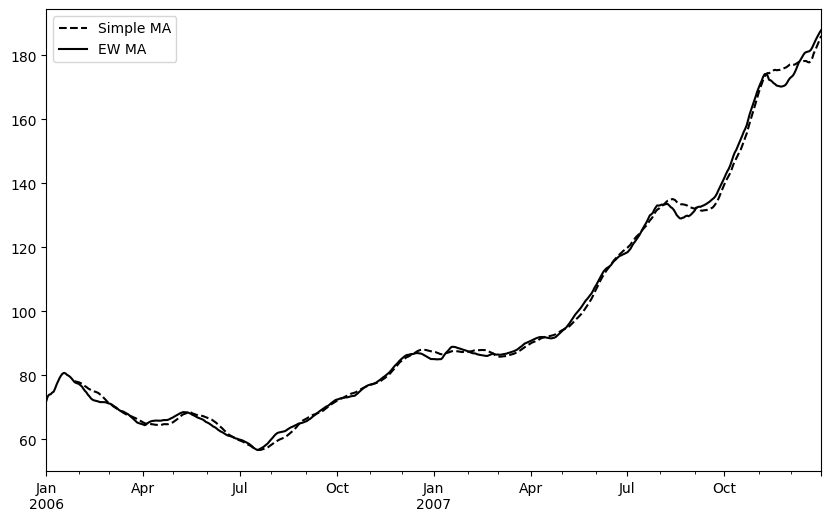

In [120]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

In [121]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [122]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<Axes: >

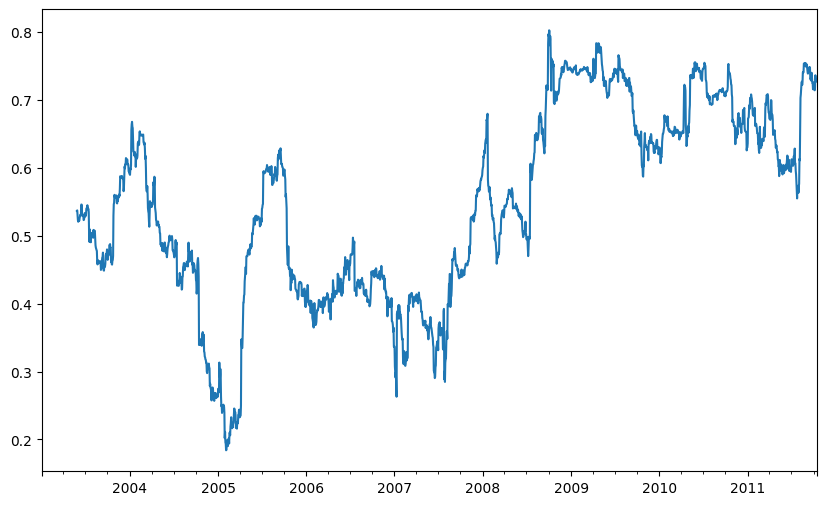

In [123]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [124]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

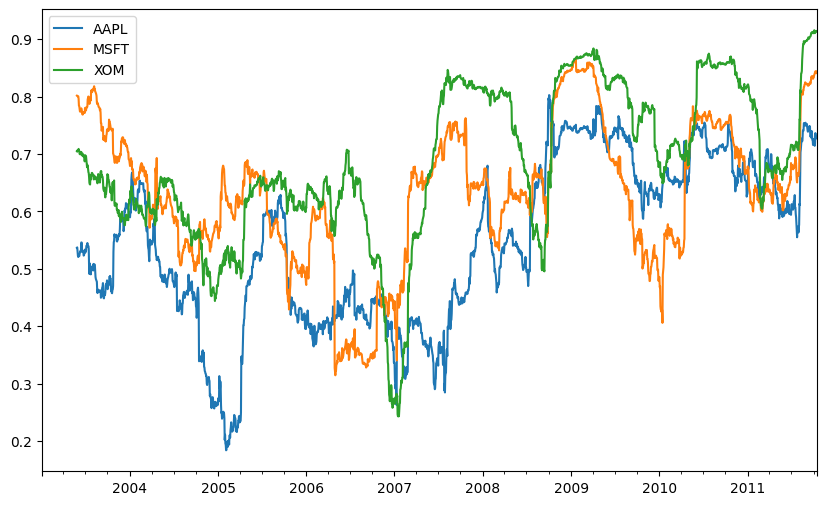

In [125]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

In [126]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [127]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

ModuleNotFoundError: No module named 'scipy'

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion